# Handwritten Digits

Handwritten digits are a classic dataset in machine learning and computer vision. They consist of images of handwritten digits (0-9) and are commonly used for training and testing image classification algorithms.

## Importing Libraries and Dataset

In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


5


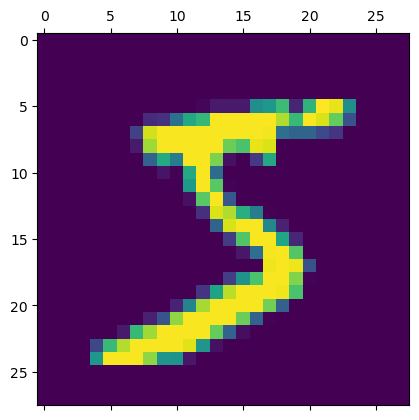

In [42]:
plt.matshow(x_train[0])
print(y_train[0])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Model

In [60]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)

model.summary()

/usr/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2686
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9843 - loss: 0.0505


## Evaluation

In [45]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9753 - loss: 0.0798


[0.0798436775803566, 0.9753000140190125]

In [49]:
y_pred_labels = [np.argmax(pred) for pred in model.predict(x_test)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


In [50]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    3,    6,    2,    1,    3,    3],
       [   0, 1127,    3,    1,    0,    1,    1,    0,    2,    0],
       [   3,    4, 1007,    2,    2,    0,    1,    4,    9,    0],
       [   0,    1,    4,  991,    1,    2,    0,    5,    2,    4],
       [   0,    0,    3,    0,  971,    0,    2,    0,    1,    5],
       [   1,    1,    0,    9,    1,  874,    3,    0,    1,    2],
       [   2,    3,    1,    2,   13,   11,  921,    0,    5,    0],
       [   0,    5,   11,    2,    4,    1,    1,  990,    4,   10],
       [   1,    1,    3,    7,    4,    9,    1,    3,  943,    2],
       [   1,    6,    0,    7,   14,    5,    1,    2,    3,  970]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

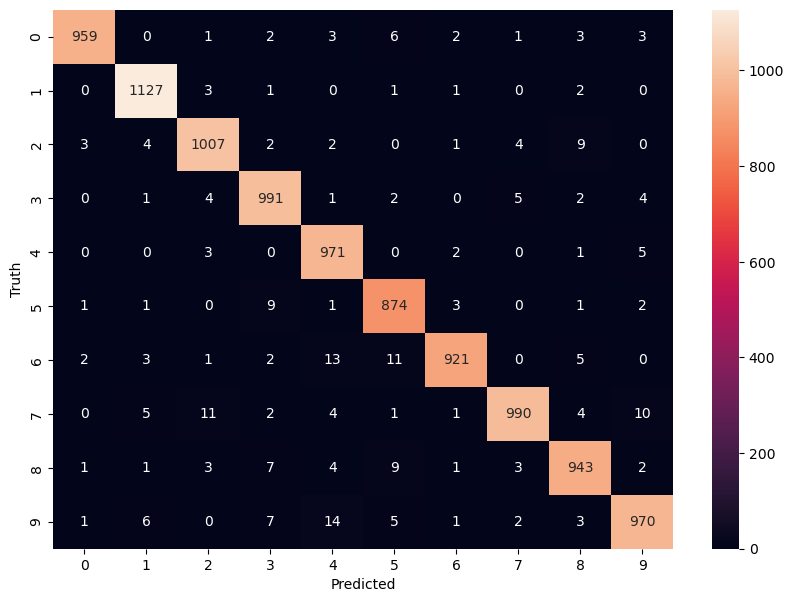

In [59]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")